In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [ ]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
import timeit

start_time = timeit.timeit()

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

2023-11-15 18:16:55.918567: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 18:16:55.918617: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 18:16:55.921262: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 18:16:56.127391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 18:17:02.883334: I tensorflow/compiler/

<tf.Tensor: shape=(), dtype=float32, numpy=-1187.8563>

In [3]:
start_time = timeit.default_timer()
print("The notebook starting time  is :", start_time)

The notebook starting time  is : 98823.687502568


In [4]:
import os  
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  

In [5]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.python.client import device_lib

print(f"Tensor Flow Version: {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Tensor Flow Version: 2.14.0
Num GPUs Available:  1


2023-11-15 18:19:34.165700: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 18:19:34.165783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 18:19:34.165810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 18:19:34.165962: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 18:19:34.165974: I tensorflow/core/co

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9018606222242661889
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3015291700
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2712057112262607955
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2"
 xla_global_id: 416903419]

In [6]:
from tensorflow.keras.preprocessing.image import load_img

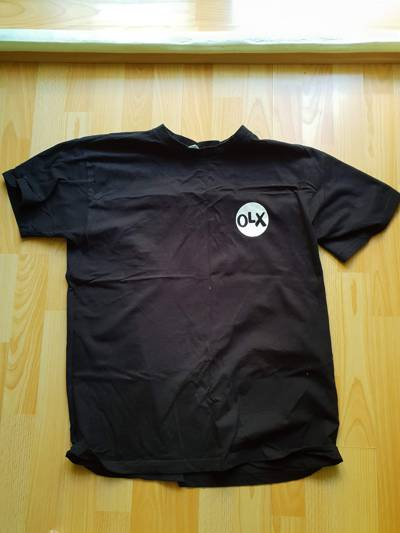

In [7]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [8]:
img = load_img(fullname, target_size=(299, 299))

In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [12]:
X = np.array([x])

In [13]:
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

2023-11-15 18:19:38.007395: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 2s 2s/step


In [16]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196404),
  ('n02916936', 'bulletproof_vest', 0.038139857),
  ('n04370456', 'sweatshirt', 0.034324694),
  ('n03710637', 'maillot', 0.011354211),
  ('n04525038', 'velvet', 0.0018453557)]]

Because imagenet 

> offer tens of millions of cleanly labeled and sorted images for most of the concepts in the WordNet hierarchy

the images may not be what we are trying to classify for our own projects. So, the need of transfer learning / reinforcement learning, using our own dense layers by excluding Xception's dense layers with `include_top=False` when we train with our own images.

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
X, y = next(train_ds)

In [21]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,          # do not include Dense layers
    input_shape=(150, 150, 3)
)

base_model.trainable = False    # freeze convolutional layers

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)       # the "long thing"

vectors = keras.layers.GlobalAveragePooling2D()(base) # slice the "long thing"

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
# model.shape
# 32 x 5 x 5 x 2048 before pooling
# 32 x 2048         after pooling
# 32 x 10           make Dense, into our 10 classes

In [25]:
learning_rate = 0.01
# more than Adam optimizers exists, experiment!
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)  

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
# 5mins

Epoch 1/10


2023-11-15 18:20:04.072064: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-15 18:20:04.497609: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 1/96 [..............................] - ETA: 6:50 - loss: 2.6508 - accuracy: 0.0625

2023-11-15 18:20:04.824869: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d10d1691e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-15 18:20:04.824912: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 970, Compute Capability 5.2
2023-11-15 18:20:04.835040: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-15 18:20:04.917227: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/96 [=======>......................] - ETA: 36s - loss: 1.8204 - accuracy: 0.5547

2023-11-15 18:20:20.135174: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.49GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-15 18:20:20.539059: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.48GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 [==============================] - ETA: 0s - loss: 1.3147 - accuracy: 0.6672

2023-11-15 18:21:01.077986: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.44GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 [==============================] - 61s 593ms/step - loss: 1.3147 - accuracy: 0.6672 - val_loss: 0.9098 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 24s 252ms/step - loss: 0.5471 - accuracy: 0.8315 - val_loss: 0.9313 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 24s 248ms/step - loss: 0.3326 - accuracy: 0.8814 - val_loss: 0.7596 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 26s 272ms/step - loss: 0.2377 - accuracy: 0.9140 - val_loss: 0.7904 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 41s 425ms/step - loss: 0.1611 - accuracy: 0.9420 - val_loss: 0.8542 - val_accuracy: 0.8446
Epoch 6/10
96/96 [==============================] - 22s 223ms/step - loss: 0.0996 - accuracy: 0.9648 - val_loss: 1.0805 - val_accuracy: 0.7273
Epoch 7/10
96/96 [==============================] - 18s 191ms/step - loss: 0.0814 - accuracy: 0.9716 - val_loss: 0.9251 - val_accuracy: 0.8065
Epoch 8/10

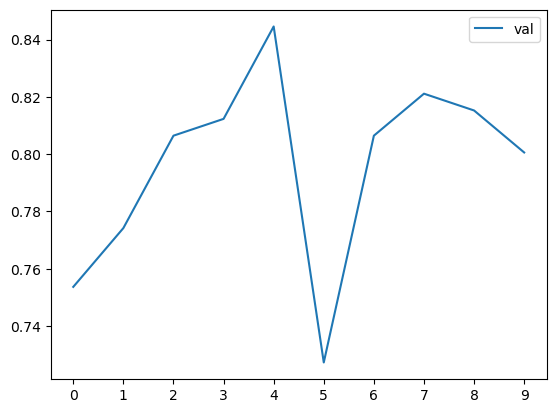

In [27]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [28]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [29]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()
    
    # 17mins

0.0001
Epoch 1/10
96/96 [==============================] - 26s 254ms/step - loss: 2.0462 - accuracy: 0.2774 - val_loss: 1.7019 - val_accuracy: 0.4399
Epoch 2/10
96/96 [==============================] - 25s 259ms/step - loss: 1.4277 - accuracy: 0.5443 - val_loss: 1.3016 - val_accuracy: 0.6070
Epoch 3/10
96/96 [==============================] - 24s 254ms/step - loss: 1.1578 - accuracy: 0.6362 - val_loss: 1.1026 - val_accuracy: 0.6628
Epoch 4/10
96/96 [==============================] - 26s 266ms/step - loss: 1.0106 - accuracy: 0.6855 - val_loss: 0.9813 - val_accuracy: 0.6979
Epoch 5/10
96/96 [==============================] - 25s 264ms/step - loss: 0.9134 - accuracy: 0.7096 - val_loss: 0.9020 - val_accuracy: 0.7067
Epoch 6/10
96/96 [==============================] - 24s 252ms/step - loss: 0.8439 - accuracy: 0.7334 - val_loss: 0.8494 - val_accuracy: 0.7302
Epoch 7/10
96/96 [==============================] - 23s 238ms/step - loss: 0.7909 - accuracy: 0.7445 - val_loss: 0.8017 - val_accuracy:

In [30]:
# del scores[0.1]
# del scores[0.0001]

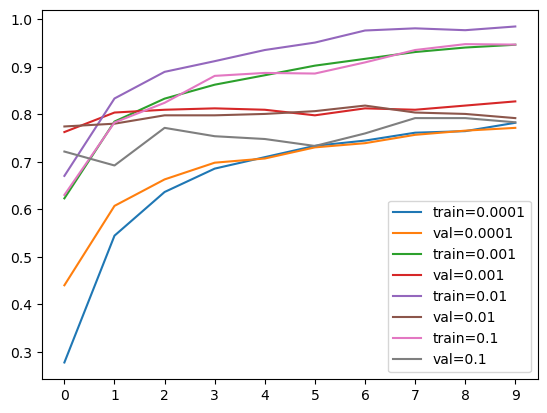

In [31]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [32]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [33]:
model.save_weights('model_v1.h5', save_format='h5')

In [34]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [35]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)
# 5mins

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.1208 - accuracy: 0.6235

/home/ellanix/micromamba/envs/py310/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 27s 261ms/step - loss: 1.1208 - accuracy: 0.6235 - val_loss: 0.7273 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 25s 262ms/step - loss: 0.6395 - accuracy: 0.7849 - val_loss: 0.6302 - val_accuracy: 0.8211
Epoch 3/10
96/96 [==============================] - 25s 259ms/step - loss: 0.5095 - accuracy: 0.8400 - val_loss: 0.5699 - val_accuracy: 0.8299
Epoch 4/10
96/96 [==============================] - 25s 254ms/step - loss: 0.4354 - accuracy: 0.8651 - val_loss: 0.5552 - val_accuracy: 0.8240
Epoch 5/10
96/96 [==============================] - 24s 248ms/step - loss: 0.3738 - accuracy: 0.8928 - val_loss: 0.5404 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 25s 256ms/step - loss: 0.3261 - accuracy: 0.9058 - val_loss: 0.5425 - val_accuracy: 0.8446
Epoch 7/10
96/96 [==============================] - 24s 249ms/step - loss: 0.2937 - accuracy: 0.9169 - val_loss: 0.5403 - val_accuracy: 0.8182
Epoch 8/10

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [36]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()
# 12mins

10
Epoch 1/10
96/96 [==============================] - 26s 245ms/step - loss: 1.6211 - accuracy: 0.4638 - val_loss: 1.1494 - val_accuracy: 0.6862
Epoch 2/10
96/96 [==============================] - 22s 232ms/step - loss: 1.0232 - accuracy: 0.6780 - val_loss: 0.9125 - val_accuracy: 0.7419
Epoch 3/10
96/96 [==============================] - 24s 244ms/step - loss: 0.8232 - accuracy: 0.7428 - val_loss: 0.8031 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 22s 231ms/step - loss: 0.6924 - accuracy: 0.7806 - val_loss: 0.7307 - val_accuracy: 0.7713
Epoch 5/10
96/96 [==============================] - 22s 232ms/step - loss: 0.6061 - accuracy: 0.8087 - val_loss: 0.7082 - val_accuracy: 0.7654
Epoch 6/10
96/96 [==============================] - 23s 243ms/step - loss: 0.5421 - accuracy: 0.8266 - val_loss: 0.7266 - val_accuracy: 0.7654
Epoch 7/10
96/96 [==============================] - 22s 233ms/step - loss: 0.4927 - accuracy: 0.8455 - val_loss: 0.6644 - val_accuracy: 0.7

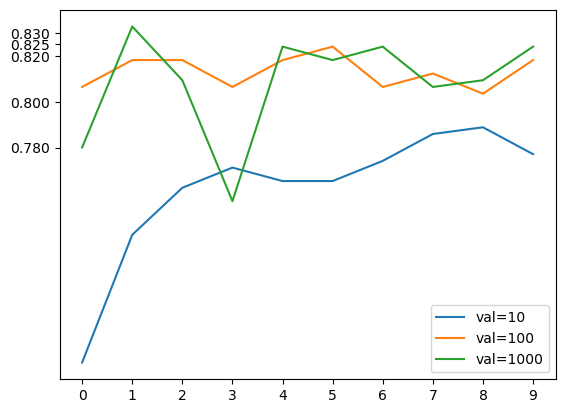

In [38]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [39]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [40]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()
#  50mins

0.0
Epoch 1/30
96/96 [==============================] - 27s 258ms/step - loss: 0.9569 - accuracy: 0.6760 - val_loss: 0.6860 - val_accuracy: 0.7478
Epoch 2/30
96/96 [==============================] - 25s 258ms/step - loss: 0.5051 - accuracy: 0.8240 - val_loss: 0.6076 - val_accuracy: 0.8006
Epoch 3/30
96/96 [==============================] - 22s 233ms/step - loss: 0.3442 - accuracy: 0.8885 - val_loss: 0.5331 - val_accuracy: 0.8152
Epoch 4/30
96/96 [==============================] - 22s 231ms/step - loss: 0.2572 - accuracy: 0.9201 - val_loss: 0.5202 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 24s 245ms/step - loss: 0.1793 - accuracy: 0.9469 - val_loss: 0.5626 - val_accuracy: 0.8182
Epoch 6/30
96/96 [==============================] - 24s 250ms/step - loss: 0.1308 - accuracy: 0.9690 - val_loss: 0.6407 - val_accuracy: 0.7977
Epoch 7/30
96/96 [==============================] - 23s 234ms/step - loss: 0.0820 - accuracy: 0.9857 - val_loss: 0.5715 - val_accuracy: 0.

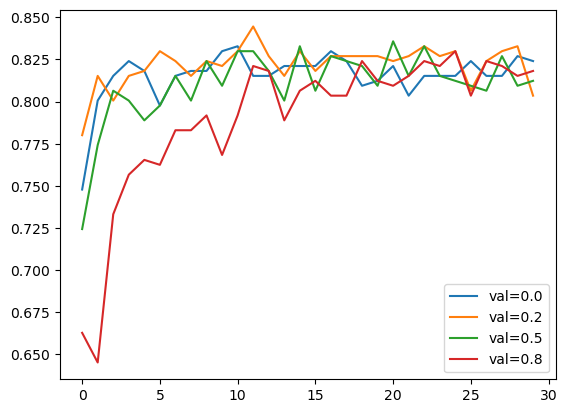

In [41]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

# plt.ylim(0.78, 0.86)
plt.legend()

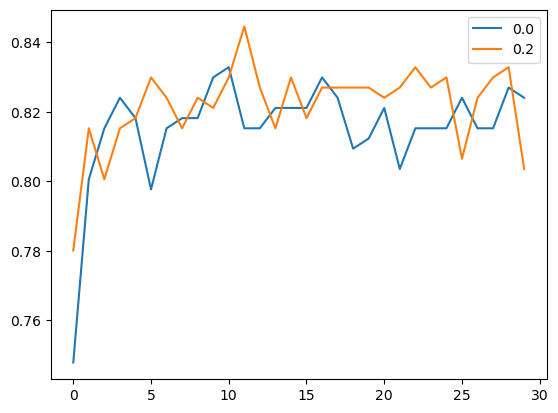

In [42]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [43]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [44]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)
# 20mins

Epoch 1/50
96/96 [==============================] - 27s 251ms/step - loss: 1.0735 - accuracy: 0.6395 - val_loss: 0.6998 - val_accuracy: 0.7713
Epoch 2/50
96/96 [==============================] - 22s 226ms/step - loss: 0.6161 - accuracy: 0.7842 - val_loss: 0.5762 - val_accuracy: 0.8035
Epoch 3/50
96/96 [==============================] - 23s 242ms/step - loss: 0.4688 - accuracy: 0.8289 - val_loss: 0.5450 - val_accuracy: 0.8035
Epoch 4/50
96/96 [==============================] - 25s 260ms/step - loss: 0.3601 - accuracy: 0.8794 - val_loss: 0.5309 - val_accuracy: 0.8211
Epoch 5/50
96/96 [==============================] - 25s 257ms/step - loss: 0.2799 - accuracy: 0.9078 - val_loss: 0.5545 - val_accuracy: 0.8299
Epoch 6/50
96/96 [==============================] - 24s 251ms/step - loss: 0.2191 - accuracy: 0.9338 - val_loss: 0.5198 - val_accuracy: 0.8211
Epoch 7/50
96/96 [==============================] - 25s 257ms/step - loss: 0.1668 - accuracy: 0.9531 - val_loss: 0.5384 - val_accuracy: 0.8299

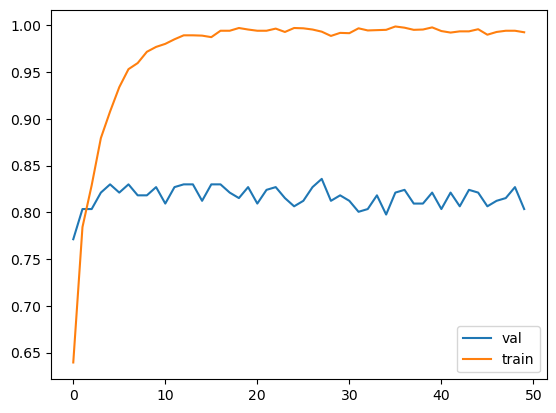

In [45]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [46]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [47]:
input_size = 299

In [48]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [49]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [50]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

# took 50 mins wsl+gpu

Epoch 1/50


2023-11-15 20:07:48.707936: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-15 20:07:49.475833: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-15 20:07:49.934986: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 353.64MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-15 20:07:49.935051: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (G

96/96 [==============================] - 78s 702ms/step - loss: 0.9931 - accuracy: 0.6910 - val_loss: 0.5177 - val_accuracy: 0.8504
Epoch 2/50
96/96 [==============================] - 58s 596ms/step - loss: 0.5219 - accuracy: 0.8305 - val_loss: 0.4261 - val_accuracy: 0.8798
Epoch 3/50
96/96 [==============================] - 57s 587ms/step - loss: 0.4425 - accuracy: 0.8504 - val_loss: 0.3816 - val_accuracy: 0.8798
Epoch 4/50
96/96 [==============================] - 57s 586ms/step - loss: 0.3836 - accuracy: 0.8693 - val_loss: 0.3967 - val_accuracy: 0.8710
Epoch 5/50
96/96 [==============================] - 57s 588ms/step - loss: 0.3528 - accuracy: 0.8771 - val_loss: 0.3766 - val_accuracy: 0.8651
Epoch 6/50
96/96 [==============================] - 58s 595ms/step - loss: 0.3249 - accuracy: 0.8957 - val_loss: 0.3557 - val_accuracy: 0.8856
Epoch 7/50
96/96 [==============================] - 57s 592ms/step - loss: 0.2998 - accuracy: 0.8977 - val_loss: 0.3612 - val_accuracy: 0.8798
Epoch 8/50

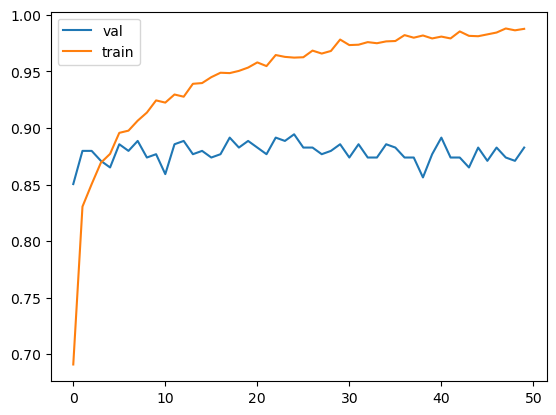

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [54]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [72]:
model = keras.models.load_model('xception_v4_1_37_0.894.h5')

In [73]:
model.evaluate(test_ds)

12/12 [==============================] - 16s 1s/step - loss: 0.3048 - accuracy: 0.8898


[0.3048075735569, 0.8897849321365356]

In [74]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [75]:
img = load_img(path, target_size=(299, 299))

In [76]:
import numpy as np

In [77]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [78]:
X = preprocess_input(X)

In [79]:
pred = model.predict(X)

1/1 [==============================] - 1s 779ms/step


In [80]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [81]:
dict(zip(classes, pred[0]))

{'dress': -2.0788138,
 'hat': -5.0110073,
 'longsleeve': -2.075161,
 'outwear': -4.001084,
 'pants': 12.440543,
 'shirt': -3.2169895,
 'shoes': -7.4835086,
 'shorts': 4.2106175,
 'skirt': -5.977509,
 't-shirt': -1.9385335}

In [82]:
# Run the op several times.
print('Time (s) to run notebook in local vs-code with GTX 970')

cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(f'CPU (s): {cpu_time}')
print()

gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(f'GPU (s): {gpu_time}')
print()
print(f'GPU speedup over CPU: {int(cpu_time/gpu_time)}x')

Time (s) to run notebook in Colab with T4 hosted runtime.
CPU (s):


0.790042705993983
GPU (s):
0.36908410300384276
GPU speedup over CPU: 2x


[elapsed to timedelta](https://stackoverflow.com/a/51846797)<br>
[timedelta components](https://stackoverflow.com/a/2119512)

In [106]:
import datetime

def days_hours_minutes(td):
    return td.seconds//3600, (td.seconds//60)%60

elapsed = timeit.default_timer() - start_time
hours, mins = days_hours_minutes(datetime.timedelta(seconds=elapsed))

print(f"The notebook completion time  is : {hours} hours and {mins} minutes")

The notebook completion time  is : 3 hours and 21 minutes


## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images



## 8.15 Hyperparameter optimization with KerasTuner

In [84]:
# !pip install keras-tuner --upgrade

In [85]:
import os  
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  

In [86]:
import keras_tuner
from tensorflow import keras

In [87]:
learning_rate = [0.0001, 0.001, 0.01, 0.1]
size = [10, 100, 1000]
droprate = [0.0, 0.2, 0.5, 0.8]

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

base_model = Xception(
    weights='imagenet',
    include_top=False,          # do not include Dense layers
    input_shape=(150, 150, 3)
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [88]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

NameError: name 'layers' is not defined

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
best_model = tuner.get_best_models()[0]